# 1.3. Monte Carlo Estimation

## 1.3.1. Introduction

Before we learn how to simulate from complicated posterior distributions, we will need to review some basics of Monte Carlo estimation. It refers to simulating hypothetical draws from a probability distribution in order to calculate important quantities of that distribution. Some of these quantities might include the mean, the variance, the probability of some event or the quantiles of the distribution. All of these calculations involve integration, which except in the simplest cases can be very difficult (or even impossible) to compute analytically

## 1.3.2. Monte Carlo Integration

Let's imagine the following model:

$\theta \sim Gamma(a,b)$
$a = 2, b = 1/3$

To calculate the mean of this distribution, we would need to compute the following integral:

$E(\theta) = \int_{0}^{\infty} \theta Pr(\theta) d\theta = \int_{0}^{\infty} \theta \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b \theta} d\theta = \frac{a}{b}$

We can also validate this answer using Monte Carlo estimation. To do so, we would need to simulate a large number of draws, $\theta_i^{*}, ~~~~i=1, ..., m$. To estimate the actual theoretical mean of this distribution, we would take the sample mean or the average of these draws.

Why can we do this? If we have a random sample from a distribution, the average of those samples converges in probability to the true mean of that distribution by the Law of Large Numbers. Furthermore, by the central limit theorem, this sample mean or the sample mean of these pieces, $\bar{\theta}^{*}$

$$\bar{\theta}^{*} = \frac{1}{m} \sum_{i=1}^{m} \theta_i^{*}$$

This sample mean approximates to a normal distribution where the mean is the true expected value of the distribution and the variance is the variance of the distribution divided by the number of draws, $m$. The theoretical variance of theta is the following integral:

$$Var(\theta) = \int_{0}^{\infty} (\theta - E(\theta))^2 Pr(\theta) d\theta = \int_{0}^{\infty} (\theta - \frac{a}{b})^2 \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b \theta} d\theta = \frac{a}{b^2}$$

Let's image that we have some function of $\theta$ from which we would like to compute the following integral:

$$\int_{0}^{\infty} h(\theta) Pr(\theta) d\theta = E[ h(\theta) ]$$
We can calculate this integral by taking the sample mean evaluated at each of these samples. If we were to calculate the sample mean where we evaluate the h function on each of our simulated samples of $\theta$. This quantity would approximate this expected value which is this integral:

$$\int_{0}^{\infty} h(\theta) Pr(\theta) d\theta = E[ h(\theta) ] \propto \frac{1}{m} \sum_{i=1}^m h(\theta_i^m)$$

One extremely useful example of such h function is the indicator function, $I_A($\theta$), where A would be some sort of logical condition about the value of $\theta$. 

Example.

$$h(\theta) = I_{\theta < 5 (\theta)}$$

This function will return $1$ if $\theta < 5$ and $0$ otherwise. The expected value is:


$$h(\theta) = I_{\theta < 5 (\theta)} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ $$
$$E( h(\theta) ) = \int_0^{\infty} I_{\theta < 5} (\theta) ~ Pr(\theta)~d \theta$$
$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \int_0^{5} 1 Pr(\theta) d \theta + \int_5^{\infty} 0 Pr(\theta) d \theta $$
$$  = Pr(0 < \theta < 5)$$
$$  \propto \frac{1}{m} \sum_{i=1}^{m} I_{\theta^* < 5} ( \theta_i^*) $$

 
This means that we could approximate this probability by drawing many samples of $\theta_{i}^{*}$, and approximating this integral with the sample mean of these indicator functions where $\theta_i^{*} < 5$ and apply it to our simulated values. It counts how many samples meet the criteria and divides it by the total number of samples. This is a very useful technique to approximate probabilities of events that are difficult to compute analytically.




## 1.3.3. Monte Carlo Error and Marginalization

How good is an approximation by Monte Carlo Sampling? We can turn to the central limit theorem which tells us that the variance of our estimate is controlled in part by $m$, our number of samples. If we want a better estimate, we need to choose a larger value. 



**EXAMPLE OF A MONTE CARLO SIMULATION**

In [13]:
import random
import numpy as np
import pandas as pd
from scipy.stats import gamma
from matplotlib import pyplot as plt

# set seed for reproducibility
random.seed(515)


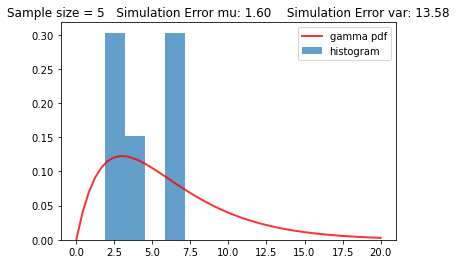

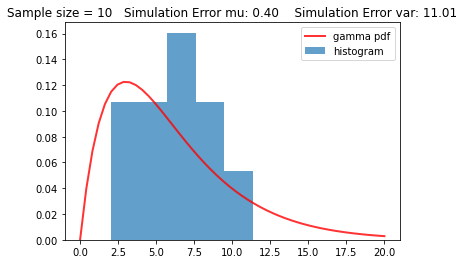

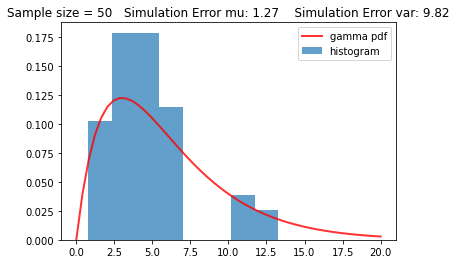

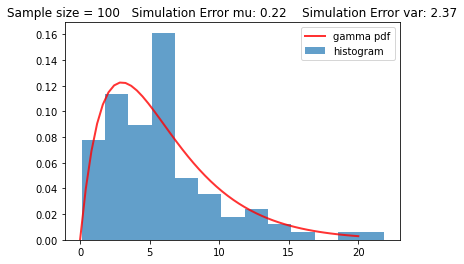

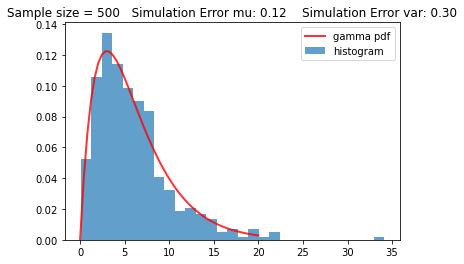

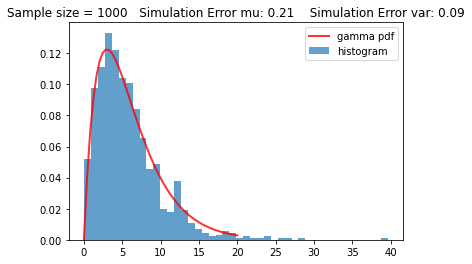

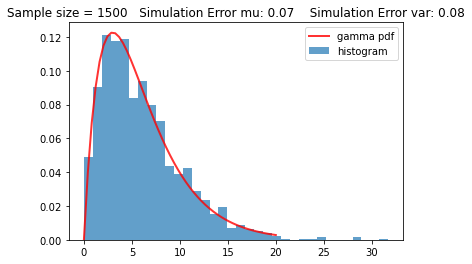

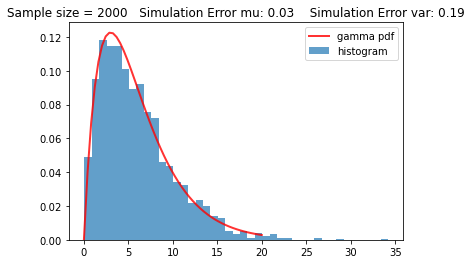

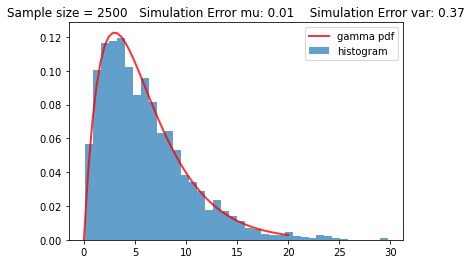

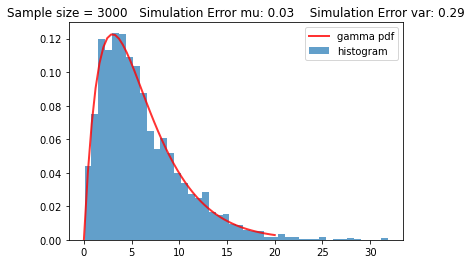

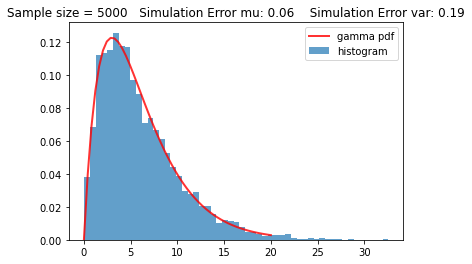

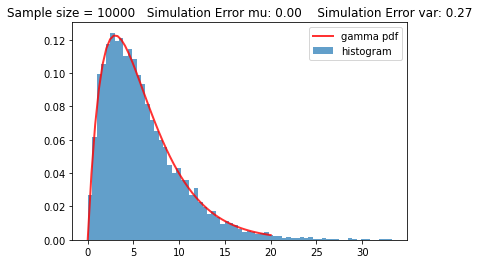

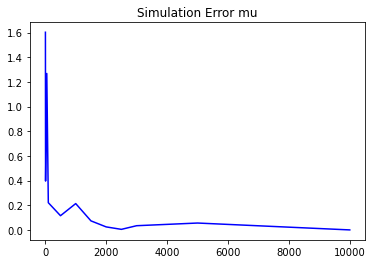

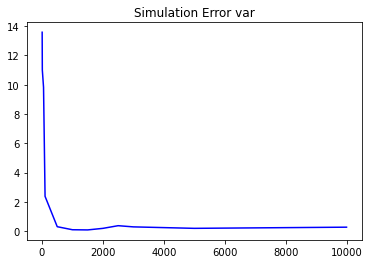

In [120]:
m = [5, 10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000]

a = 2.0
b = 3.0

expected_value = a * b
variance  = a * (b ** 2)

simulation_errors_mu = []
simulation_errors_var = []

for i in m:
    # simulate m independent samples from this gamma distribution, we are going to Python's gamma function
    theta = gamma(a, scale=b).rvs(i)
    
    # compute sample mean
    sample_mean = np.mean(theta)
    sample_var = np.var(theta)
    
    # compute simulation error
    simulation_error_mu = np.abs(expected_value - sample_mean)
    simulation_error_var = np.abs(variance - sample_var)
    
    simulation_errors_mu.append(simulation_error_mu)
    simulation_errors_var.append(simulation_error_var)
    
    # plot theta
    # in the same figure, plot the histogram of samples and the best fit line for the Gamma distribution
    plt.hist(theta, bins='auto', density=True, histtype='stepfilled', label='histogram', alpha=0.7)
    x = np.linspace(0, 20)
    plt.plot(x, gamma(a, scale=b).pdf(x), 'r-', lw=2, alpha=0.8, label='gamma pdf')
    plt.title(f'Sample size = {i}   Simulation Error mu: {simulation_error_mu:.2f}    Simulation Error var: {simulation_error_var:.2f}')
    plt.legend()
    plt.show()

plt.plot(m, simulation_errors_mu, 'b-')
plt.title('Simulation Error mu')
plt.show()

plt.plot(m, simulation_errors_var, 'b-')
plt.title('Simulation Error var')
plt.show()


### Estimation of Pr( X < 5 )

In [129]:
X = 5
ind_func = theta < X

# count the TRUE values in ind_func
sample_mean_p5 = np.mean(ind_func)

# get the theoretical probability for Pr(X < 5)
cdf_value = gamma.cdf(X, a, scale=b)

print(f'Sample mean: {sample_mean_p5:.4f}    CDF value: {cdf_value:.4f}')



Sample mean: 0.4975    CDF value: 0.4963


### Estimation of 90th Percentile

In [131]:
sample_quantile = np.quantile(theta, 0.9)
p90 = gamma.ppf(0.9, a, scale=b)

print(f'Sample quantile: {sample_quantile:.4f}    PPF value: {p90:.4f}')

Sample quantile: 11.7056    PPF value: 11.6692


## 1.3.4. Computing the Monte Carlo Error

We can use the central limit theorem to approximate how accurate our Monte Carlo estimates are. For example, the sample mean of the simulated thetas approximately follows a Normal distribution, where the mean is the true expected value of theta, and the variance is the true variance of theta divided by m. That means that if we increase m to be a very large number, the variance of our Monte Carlo estimate gets very small. In other words, our Monte Carlo estimate will be very accurate.

In [135]:
m = 10000
s_error = np.std(theta) / np.sqrt(m)
s_error

0.04274092400651133

This is the standard error of our approximation to the expected value of theta. If we wanted to create a confidence interval for our Monte Carlo approximation, we could look at for example two times the standard error. That is, we are reasonably confident that about 95% of the time, our Monte Carlo estimate will be within two standard errors of the true expected value of theta. More precisely, it will be no more far than 0.084954 from the true expected value of theta.

In [137]:
# create the conficence interval
conf_interval = [ np.mean(theta) - 2.0*s_error ,  np.mean(theta) + 2.0*s_error ]
conf_interval


[5.913819223357759, 6.084782919383805]

In [139]:
# confidence interval for Pr(X < 5)

s_error_p5 = np.std(ind_func) / np.sqrt(m)
conf_interval_p5 = [ sample_mean_p5 - 2.0*s_error_p5 ,  sample_mean_p5 + 2.0*s_error_p5 ]
conf_interval_p5


[0.48750012500078127, 0.5074998749992188]

**SIMULATION FROM A HIERARCHICAL BAYESIAN MODEL**

In [26]:
def table( y, freq=True ):
    unique_values, counts = np.unique(y, return_counts=True)
    if not freq:
        counts = counts / len(y)
    value_counts = dict(zip(unique_values, counts))
    return value_counts

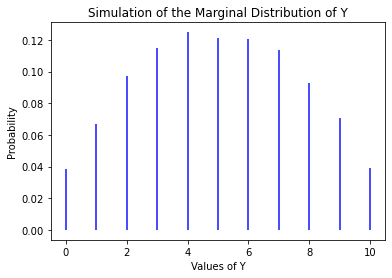

4.9963

In [34]:
from scipy.stats import beta
from scipy.stats import binom

m = 10000

# Draw m samples from the beta distribution
phi = beta.rvs(2.0, 2.0, size=m)

# Draw m samples from the binomial distribution using the corresponding phi values
y = binom.rvs(10, phi, size=m)

# check the number of occurences of each value in y and divide by the sample size
simulation = table(y, freq=False)

# simulation plot of the marginal distribution of y
plt.vlines(simulation.keys(), ymin=0, ymax=simulation.values(), color='b', alpha=0.7, linewidth=2)
plt.title('Simulation of the Marginal Distribution of Y')
plt.ylabel('Probability')
plt.xlabel('Values of Y')
plt.show()

# Marginal expected value of Y
np.mean(y)


### Exercises

Laura keeps record of her loan applications and performs a Bayesian analysis of her success rate $\theta$. Her analysis yields a Beta(5, 3) posterior distribution for $\theta$.

The posterior mean for $\theta$ is equal to $\frac{5}{5+3}=0.625$. However, Laura likes to think in terms of the odds of succeeding, defined as $\frac{\theta}{1-\theta}$ the probability of success divided by the probability of failure.

Simulate a large number of samples (more than 10,000) from the posterior distribution for $\theta$ and use these samples to approximate the posterior mean for Laura's odds of success $E(\frac{\theta}{1-\theta})$

In [35]:
from scipy.stats import beta

# specify the parameters of the beta distribution
a = 5.0
b = 3.0

# Generate 10,000 samples from the Beta(5, 3) posterior distribution for θ
m = 10000
theta = beta.rvs(a, b, size=m)

# calculate the odds of success
odds = theta / (1 - theta)

# compute the approximate posterior mean of the odds
posterior_mean = np.mean( odds )

print(f'Posterior mean of the odds: {posterior_mean:.4f}')


Posterior mean of the odds: 2.4610


Laura also wants to know the posterior probability that her odds of success on loan applications is greater than 1.0 (in other words, better than 50:50 odds). 

Use your Monte Carlo sample from the distribution of θ to approximate the probability that $\frac{1}{1-\theta}$ is greater than 1.0.

Report your answer to at least two decimal places.

In [36]:
ind_func = odds > 1.0

odds_sample_mean = np.mean( ind_func )

print(f'Sample mean: {odds_sample_mean:.4f}')

Sample mean: 0.7695


Use a (large) Monte Carlo sample to approximate the 0.3 quantile of the standard normal distribution N(0,1), the number such that the probability of being less than it is 0.3.

Report your answer to at least two decimal places.

In [48]:
from scipy.stats import norm

# Generate 100,000 samples from the standard normal distribution N(0, 1)
num_samples = 100000
normal_samples = norm(0,1).rvs(size=num_samples)

# Find the 0.3 quantile (30th percentile) of the standard normal distribution
quantile_0_3 = np.percentile(normal_samples, 30)

mean_quantile = np.mean(quantile_0_3)

# Print the 0.3 quantile
print(f"0.3 quantile of the standard normal distribution: {mean_quantile}")

0.3 quantile of the standard normal distribution: -0.5206825810444871


To measure how accurate our Monte Carlo approximations are, we can use the central limit theorem. If the number of samples drawn 
m is large, then the Monte Carlo sample mean $\bar{\theta}^{*}$ used to estimate $E(\theta)$ approximately follows a normal distribution with mean $E(\theta)$  and variance $VAR(\theta)/m$. If we substitute the sample variance for $VAR(\theta)$ we can get a rough estimate of our Monte Carlo standard error (or standard deviation).

Suppose we have 100 samples from our posterior distribution for $\theta$ called $\bar{\theta}^{*}$ and that the sample variance of these draws is $5.2$. A rough estimate of our Monte Carlo standard error would then be $\sqrt{5.2/100} \approx 0.228$. So our estimate $\bar{\theta^{*}}$ is probably within 0.456 (two standard errors) of the true $E(\theta)$.

What does the standard error of our Monte Carlo estimate become if we increase our sample size to 5,000? Assume that the sample variance of the draws is still 5.2.

Report your answer to at least three decimal places.

In [49]:
np.sqrt( 5.2/5000 )

0.0322490309931942